# Stroke Prediction Dataset
https://www.kaggle.com/fedesoriano/stroke-prediction-dataset  
La idea sería predecir si el paciente es propenso a tener ("likely to have") un ACV (stroke) en base a características como género, hipertención, IMC, fumador, **SI SE CASÓ ALGUNA VEZ (?)**, etc.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("datasets/stroke/healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
# Balance del dataset
cant_strokes = df.stroke.sum()
print(f"La proporción de datos con stroke positivo es del {cant_strokes/df.shape[0]*100:.1f} %")

La proporción de datos con stroke positivo es del 4.9 %


In [4]:
# Buscamos NaNs
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

---
No sabemos si conviene eliminar los pacientes con NaNs en BMI o reemplazar por el mean o algo así  
No quisiéramos perder casos con stroke positivo ya que no tenemos muchos

In [5]:
df_clean = df.dropna()
print(f"{'strokes en df':20} {df.stroke.sum()}")
print(f"{'strokes en df_clean':20} {df_clean.stroke.sum()}")

strokes en df        249
strokes en df_clean  209


Por ahora llenamos con la mediana

In [6]:
bmi_median = df.bmi.median()  # 28.1
df.bmi.fillna(bmi_median, inplace=True)

---

In [7]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
# Tenemos 3 variables numéricas
num_cols = ["age", "avg_glucose_level", "bmi"]  # El BMI es el IMC
num_df = df[num_cols]
# El resto son categóricas, algunas binarias y otras con varias opciones
cat_df = df[['id', 'gender', 'hypertension', 'heart_disease', 'ever_married',
             'work_type', 'Residence_type', 'smoking_status', 'stroke']]

## Correlation Matrix

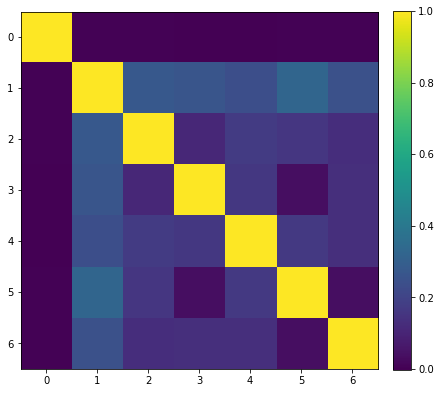

In [9]:
plt.figure(figsize=(7, 7))
plt.imshow(df.corr())
plt.colorbar(fraction=0.0459, pad=0.04)  # Magia que encontré online para que la colorbar quede alineada

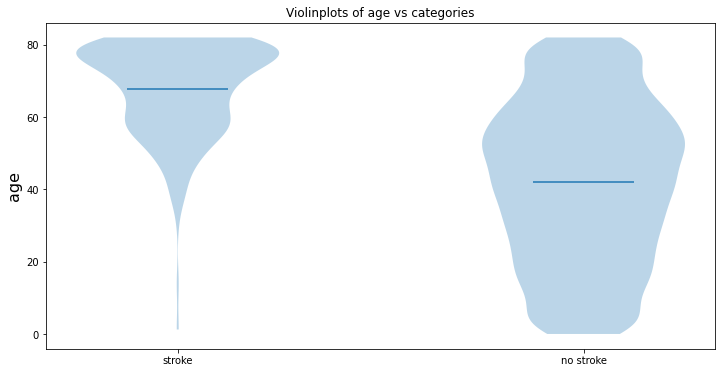

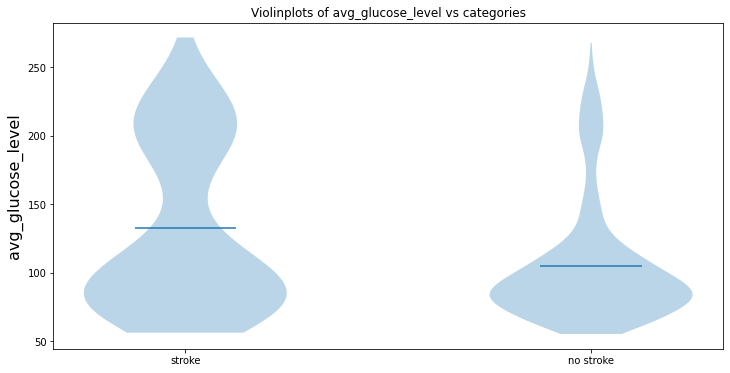

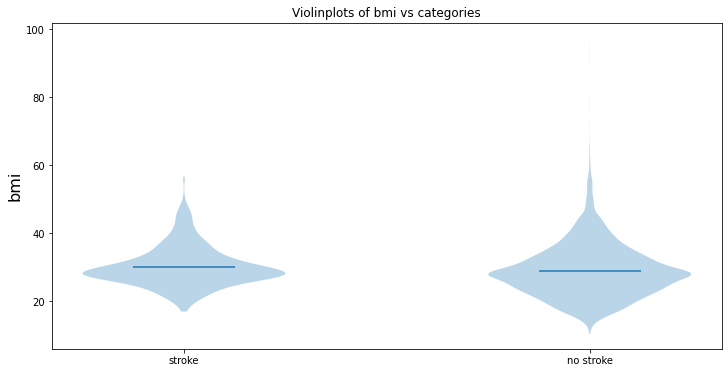

In [10]:
def violinplot(variable):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)

    categories = df["stroke"].unique()  # 0 y 1

    datos = [num_df.loc[(df["stroke"] == cat)][variable] for cat in categories]

    ax.violinplot(dataset=datos, showextrema=False, showmeans=True, points=1000)
    ax.xaxis.set_ticks(range(1, len(categories) + 1))
    ax.xaxis.set_ticklabels(["stroke", "no stroke"])
    ax.set_ylabel(variable, fontsize=16)
    plt.title(f"Violinplots of {variable} vs categories")


for var in num_df.columns:
    violinplot(var)

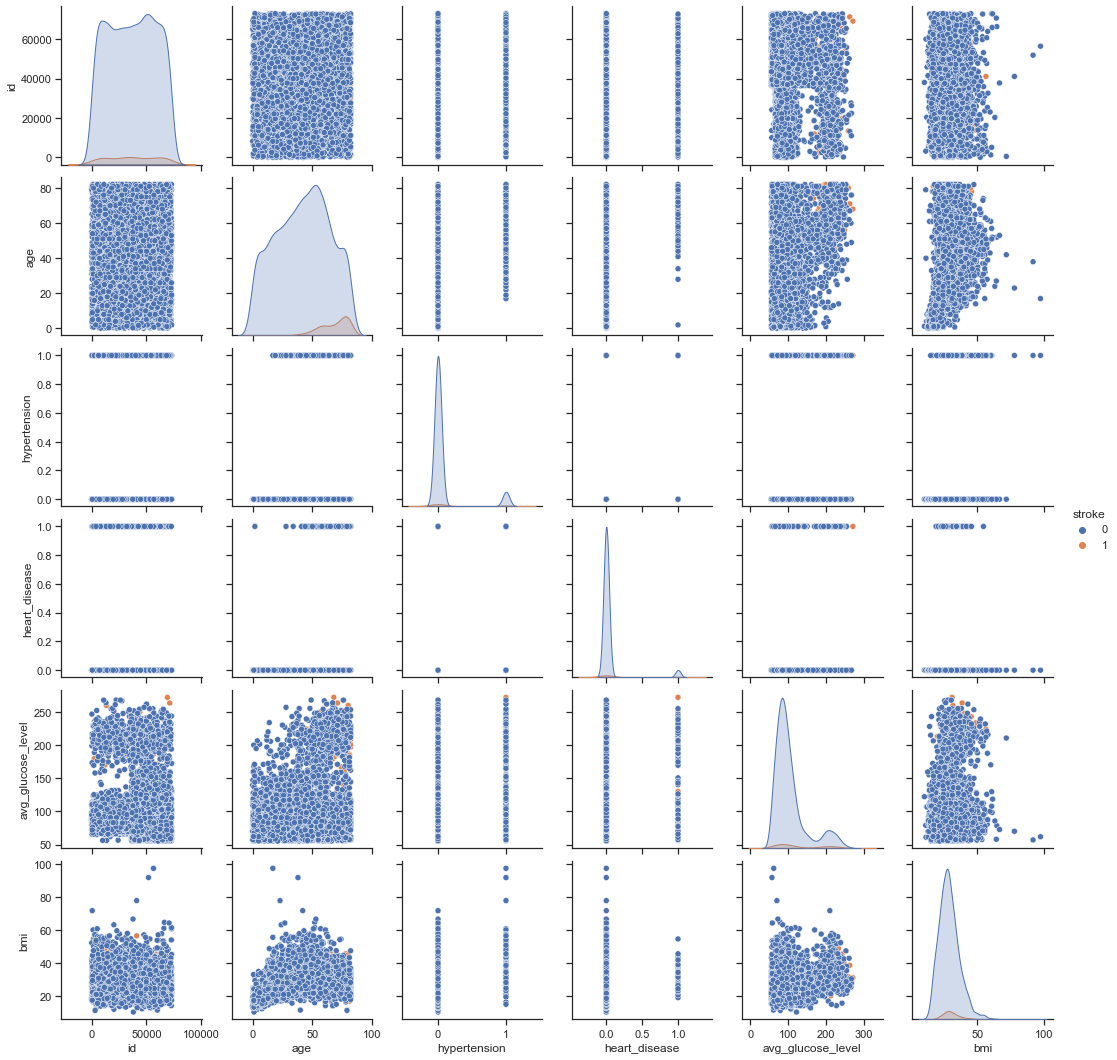

In [4]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(df, hue="stroke")

<AxesSubplot:>

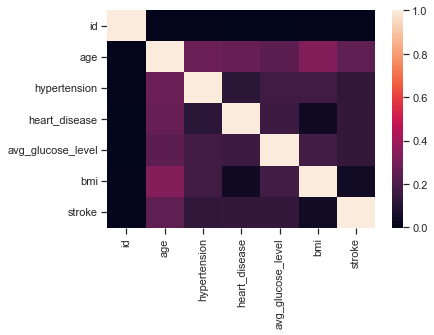

In [5]:
sns.heatmap(df.corr())

Otro problema son los Unknown en smoking_status

In [11]:
idx = df[(df["smoking_status"] == "Unknown")].index

In [12]:
df.drop(idx).stroke.value_counts()

0    3364
1     202
Name: stroke, dtype: int64

In [15]:
smokers = {
    "never smoked": 0,
    "Unknown": 1,
    "formerly smoked": 2,
    "smokes": 3,
}

df["smoking_num"] = [smokers[cat] for cat in df.smoking_status]

In [19]:
df["gender_num"] = []

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,smoking_num
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,2
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,3
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,2


In [24]:
df.work_type.unique()
# Orden de estrés: children --> Never_worked --> Private+Govt_job --> Self-employed => StdScaler
# Sino, usar un OneHotEncoder

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [55]:
work_types = {
    'Private': 2,
    'Self-employed': 3,
    'Govt_job': 2,
    'children': 0,
    'Never_worked': 1,
}

df["work_type_num"] = [work_types[cat] for cat in df.work_type]

In [21]:
df.Residence_type.unique()

array(['Urban', 'Rural'], dtype=object)

In [25]:
df.ever_married.unique()

array(['Yes', 'No'], dtype=object)

28.62099290780142


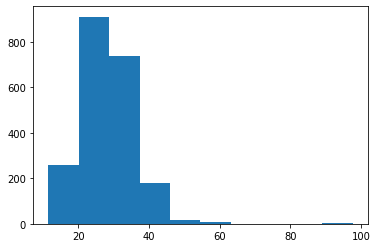

In [32]:
plt.hist(df.bmi[df.gender=="Male"])
print(df.bmi[df.gender=="Male"].mean())

29.03446893787575


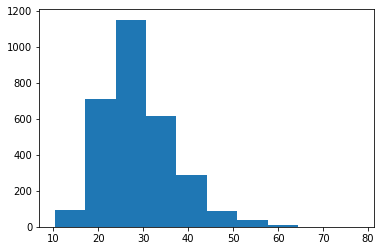

In [33]:
plt.hist(df.bmi[df.gender=="Female"])
print(df.bmi[df.gender=="Female"].mean())

22.110973084886126


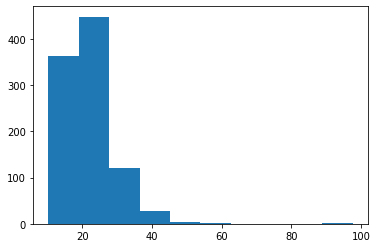

In [34]:
filtro_edad = df.age<20
plt.hist(df.bmi[filtro_edad])
print(df.bmi[filtro_edad].mean())

30.496670746634024


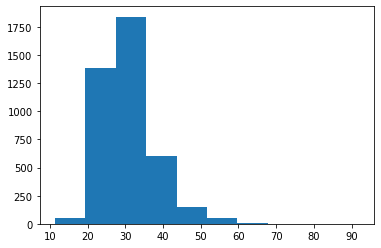

In [35]:
filtro_edad = df.age>20
plt.hist(df.bmi[filtro_edad])
print(df.bmi[filtro_edad].mean())

(array([434., 362., 440., 484., 597., 583., 686., 559., 407., 558.]),
 array([8.0000e-02, 8.2720e+00, 1.6464e+01, 2.4656e+01, 3.2848e+01,
        4.1040e+01, 4.9232e+01, 5.7424e+01, 6.5616e+01, 7.3808e+01,
        8.2000e+01]),
 <BarContainer object of 10 artists>)

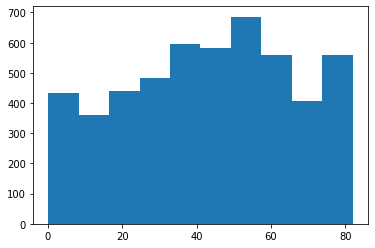

In [36]:
plt.hist(df.age)

In [47]:
edades = [10, 20, 30, 40, 50, 60, 70, 100]
for i, edad in enumerate(edades):
    if i == 0:
        print(f"Hasta: {edad:3} - BMI: {df.bmi[(df.age<edad)&(df.age>0)].median():.2f}")
    else:
        print(f"Hasta: {edad:3} - BMI: {df.bmi[(df.age<edad)&(df.age>edades[i-1])].median():.2f}")

Hasta:  10 - BMI: 18.40
Hasta:  20 - BMI: 23.60
Hasta:  30 - BMI: 26.90
Hasta:  40 - BMI: 29.30
Hasta:  50 - BMI: 29.70
Hasta:  60 - BMI: 30.30
Hasta:  70 - BMI: 29.50
Hasta: 100 - BMI: 28.10


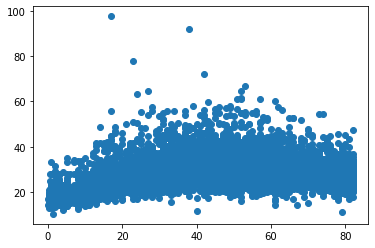

In [46]:
plt.scatter(df.age, df.bmi)

In [49]:
df["Residence_type_num"] = [0 if cat == "Rural" else 1 for cat in df.Residence_type]

In [51]:
df["gender_num"] = [0 if cat == "Male" else 1 for cat in df.gender]

In [53]:
df["ever_married_num"] = [0 if cat == "No" else 1 for cat in df.ever_married]

In [57]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,smoking_num,Residence_type_num,gender_num,ever_married_num,work_type_num
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,2,1,0,1,2
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,0,0,1,1,3
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0,0,0,1,2
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,3,1,1,1,2
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0,0,1,1,1,2
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,0,1,1,1,3
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,0,0,1,1,3
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,2,0,0,1,2


In [58]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [62]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'smoking_num', 'Residence_type_num',
       'gender_num', 'ever_married_num', 'work_type_num'],
      dtype='object')

In [63]:
cols =[
    'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
    'bmi', 'stroke', 'smoking_num', 'Residence_type_num',
    'gender_num', 'ever_married_num', 'work_type_num'
]
df_ml = df[cols]
train_df, test_df = train_test_split(df_ml, test_size=0.2, random_state=42)

In [64]:
x_train = train_df.drop(["stroke"], axis=1)
t_train = train_df["stroke"]
x_test = test_df.drop(["stroke"], axis=1)
t_test = test_df["stroke"]

In [65]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [73]:
modelo = Pipeline([
    ("poly", PolynomialFeatures()),
    ("reg", LinearRegression(fit_intercept=False))
])

from sklearn.model_selection import GridSearchCV

hyperparameters = {'poly__degree': np.arange(1, 6)}
grilla = GridSearchCV(modelo, hyperparameters, refit=True, cv=6, verbose=2, n_jobs=-1)
grilla.fit(x_train_scaled, t_train)

Fitting 6 folds for each of 5 candidates, totalling 30 fits


GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('reg',
                                        LinearRegression(fit_intercept=False))]),
             n_jobs=-1, param_grid={'poly__degree': array([1, 2, 3, 4, 5])},
             verbose=2)

In [72]:
GridSearchCV?

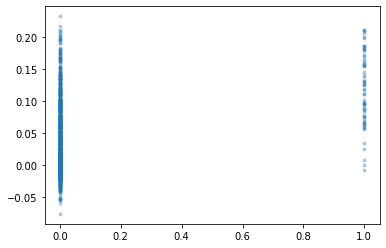

In [71]:
elmejor = grilla.best_estimator_
plt.plot(t_test, elmejor.predict(x_test_scaled), ".", alpha=0.3)

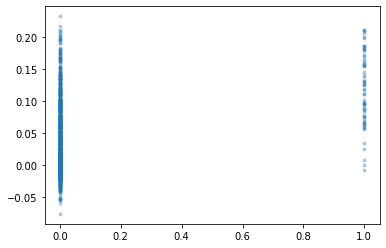

In [74]:
elmejor = grilla.best_estimator_
plt.plot(t_test, elmejor.predict(x_test_scaled), ".", alpha=0.3)
# sin neg_blabla

In [75]:
print(grilla.best_params_)

{'poly__degree': 1}


In [76]:
modelo = Pipeline([
    ("poly", PolynomialFeatures()),
    ("reg", LinearRegression(fit_intercept=False))
])

from sklearn.model_selection import GridSearchCV

hyperparameters = {'poly__degree': np.arange(1, 3)}
grilla = GridSearchCV(modelo, hyperparameters, refit=True, cv=30, verbose=3, n_jobs=-1)
grilla.fit(x_train_scaled, t_train)

Fitting 30 folds for each of 2 candidates, totalling 60 fits


GridSearchCV(cv=30,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('reg',
                                        LinearRegression(fit_intercept=False))]),
             n_jobs=-1, param_grid={'poly__degree': array([1, 2])}, verbose=3)

{'poly__degree': 1}


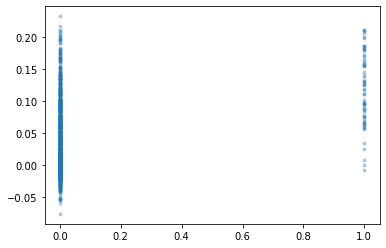

In [78]:
print(grilla.best_params_)
elmejor = grilla.best_estimator_
plt.plot(t_test, elmejor.predict(x_test_scaled), ".", alpha=0.3)

In [79]:
from sklearn.metrics import mean_squared_error as mse
def rmse(x, t):
    return np.sqrt(mse(x, t))

In [80]:
ypred_train = elmejor.predict(x_train_scaled)
ypred_test = elmejor.predict(x_test_scaled)

In [84]:
print(f"RMSE train: {rmse(t_train, ypred_train):.3f}\nRMSE test:  {rmse(t_test, ypred_test):.3f}")

RMSE train: 0.201
RMSE test:  0.227


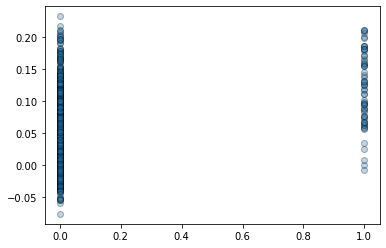

In [94]:
# plt.scatter(t_train, ypred_train)
plt.scatter(t_test, ypred_test, alpha=0.3, edgecolors="black")